In [1]:
#### // 숫자 인식 인공지능 만들기

#### // ===================================================================================================== 1. 개발 환경 만들기
import numpy as np  ## 수학 계산 라이브러리
import matplotlib.pyplot as plt  ## 그래프 라이브러리  ## 그래프 라이브러리

from tensorflow.keras.models import Sequential  ## 순차 형태의 인공 신경망 함수
from tensorflow.keras.layers import Dense, Activation ## 전 결합층(입력층, 은닉층, 출력층 - 각 레이어의 뉴런 개수 설정), 활성화 함수
from tensorflow.keras.utils import to_categorical  ## 숫자 이미지를 학습 시키기 위한 원-핫 인코딩 구현 함수
from tensorflow.keras.datasets import mnist ## 딥러닝 모델 개발용 데이터셋을 불러오는 명령어

In [2]:
#### // 숫자 인식 인공지능 만들기

#### // ===================================================================================================== 2. 데이터셋 불러오기

#### // 훈련 데이터와 검증 데이터
(x_train, y_train), (x_test, y_test) = mnist.load_data()  
## mnist 데이터셋에서 데이터를 불러오는 명령어
## mnist 데이터는 하기와 같이 네 부분의 데이터로 나뉘어 있다.
## 이 값들은 모두 넘파이 라이브러리를 사용하여 만든 값
print("x_train shape", x_train.shape)  ## 총 60,000 개의 데이터가 있으며, 각 데이터에는 가로 28개 세로 28개의 데이터가 있다.
print("y_train shape", y_train.shape)  ## 총 60,000 개의 데이터가 있다.
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
#### // 숫자 인식 인공지능 만들기

#### // ===================================================================================================== 3. X의 형태 바꾸기
#### // 28 x 28 형태의 데이터를 인공지능 모델에 넣으려면 형태를 바꿀 필요가 있다.
#### // 인공 신경망의 입력층에 데이터를 넣을 때 한 줄로 만들어서 넣어야 한다.
#### // 28 x 28 형태의 데이터를 1 x 784 형태처럼 한 줄로 만든 후 딥러닝 모델에 입력하는 코드

X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
## 28 x 28 형태의 데이터를 1 x 784로 바꾸는 명령어
## reshape는 넘파이의 명령어임.
## 여기서 784는 가로 X 세로인 28 X 28을 한 값

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
## 정수형 데이터를 실수형 데이터로 자료형 변경

X_train /= 255
X_test /= 255
## 데이터 정규화: 데이터 특성을 더 잘 드러나도록 하기 위함
## 데이터가 정규화되면 학습이 잘 이루어짐.
## 검은색은 0, 흰색은 255, 회색은 1 ~ 254 사이의 값


print("X training matrix shape", X_train.shape)
print("X testing matrix shape", X_test.shape)

X training matrix shape (60000, 784)
X testing matrix shape (10000, 784)


In [4]:
#### // ===================================================================================================== 4. Y의 형태 바꾸기
#### // 28 x 28 형태의 데이터를 인공지능 모델에 넣으려면 형태를 바꿀 필요가 있다.
#### // 인공 신경망의 입력층에 데이터를 넣을 때 한 줄로 만들어서 넣어야 한다.
#### // 28 x 28 형태의 데이터를 1 x 784 형태처럼 한 줄로 만든 후 딥러닝 모델에 입력하는 코드

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
## 데이터를 원-핫 인코딩
## to_categoric 함수는 수치형 데이터를 범주형 데이터로 만들어 주는 함수
## 변경 전 데이터와 원-핫 인코딩할 숫자. 몇 개로 구분하고자 하는지가 필요하다.
## 인공지능이 예측하는 결과는 0 ~ 9까지의 숫자이므로 분류하고자 하는 값은 열 개.

print("Y training matrix shape", Y_train.shape)
print("Y testing matrix shape", Y_test.shape)

Y training matrix shape (60000, 10)
Y testing matrix shape (10000, 10)


In [5]:
#### // ===================================================================================================== 5. 인공지능 모델 설계하기
#### // 인공지능 레이어: 총 4개
#### // 레이어1: 입력층 - 뉴런(노드)의 개수는 784개(28 x 28개 픽셀로 이루어진 숫자의 모습)
#### // 레이어2: 은닉층1 - 뉴런(노드)의 개수는 512개
#### // 레이어3: 은닉층2 - 뉴런(노드)의 개수는 256개
#### // 레이어4: 출력층 - 뉴런(노드)의 개수는 10개
#### // 각 레이어의 각 노드 활성화 함수로 렐루 함수 사용
#### // 가장 높은 확률의 값으로 분류하기 위해서 각 노드의 최종 값을 소프트맥스 함수를 사용하여 나타냄

model = Sequential()
## 인공지능 모델을 시퀀셜 방식으로 개발
## 딥러닝에 사용할 모델을 시퀀셜 모델로 개발

model.add(Dense(512, Activation('relu'), input_shape = (784, )))
## 모델에 층을 추가. add 명령어
## 추가하는 층의 형태를 설정하기 위해 Dense 함수 사용

model.add(Activation('relu'))
## 함수의 첫 번째 인자는 해당 은닉층의 뉴런(노드) 수이며, 512개이다.
## 함수의 두 번째 인자는 다음 층으로 값을 전달할 때 어떤 활성화 함수를 사용하여 전달할지를 결정(렐루 함수)
## Relu 함수의 의미: x의 값이 0 보다 클때는 그대로 흘러주고 0보다 작을 때는 무시하는 형태입니다. 
## 함수의 세 번째 인자는 입력하는 데이터의 형태(784, )

model.add(Dense(256, Activation('relu')))
## 모델에 층을 추가. add 명령어
## 추가하는 층의 형태를 설정하기 위해 Dense 함수 사용
## 함수의 첫 번째 인자는 해당 은닉층의 뉴런(노드) 수이며, 256개이다.
## 함수의 두 번째 인자는 다음 층으로 값을 전달할 때 어떤 활성화 함수를 사용하여 전달할지를 결정(렐루 함수)
## Relu 함수의 의미: x의 값이 0 보다 클때는 그대로 흘러주고 0보다 작을 때는 무시하는 형태.

model.add(Dense(10, Activation('softmax')))
## 모델에 층을 추가. add 명령어
## 추가하는 층의 형태를 설정하기 위해 Dense 함수 사용
## 함수의 첫 번째 인자는 해당 은닉층의 뉴런(노드) 수이며, 10개이다.
## 최종 결과 값이 0부터 9

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [6]:
#### // ===================================================================================================== 6. 모델 학습(딥러닝 기법)
#### // 모델 실행 과정
#### // 데이터
#### // 심층 신경망
#### // 예측한 결과(Output) <-> 실제 정답과 비교
#### // 비교 결과: 오차가 있으면 다시 학습, 없으면 성공
#### // 오차를 줄이기 위한 방법: 경사 하강법

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
## compile: 케라스의 심층 신경망 학습 방법 명령어: 
## compile: 다중 분류 문제에 대한 오차 값 계산 방법: categorical_crossentropy
## optimizer: 오차 감소 방법 - 경사 하강법 알고리즘
## optimizer: 옵티마이저 라이브러리 - 경사 하강법에 대한 사용 방식을 모아 놓은 라이브러리
## optimizer: 옵티마이저 종류 - https://ganghee-lee.tistory.com/24
## optimizer: <Gradient descent(GD)>
## optimizer: <Stochastic gradient decent(SGD)> 
## optimizer: <Momentum>
## optimizer: <AdaGrad>
## optimizer: <RMSProp>
## optimizer: <Adam>
## optimizer: <Nadam>
## metrics: 학습 결과
## metrics: 정확도 - 실제 데이터와 실제 값을 비교해 본 후 정답 비율을 알려 줌

model.fit(X_train, Y_train, batch_size = 128, epochs = 10, verbose = 1)
## 실제 학습: fit() 함수
## 학습 규칙
## 1. 입력 데이터 - x_train, y_train
## 2. 배치 사이즈(batch_size) - 인공지능 모델이 한 번에 학습하는 데이터의 수
## 3. 에포크(epochs) - 모든 데이터에 대한 학습 반복 횟수
## 4. verbose - fit() 함수의 결과 출력 방법(0, 1, 2 중 하나)

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.2250 - accuracy: 0.9354
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0844 - accuracy: 0.9736
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0524 - accuracy: 0.9835
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0366 - accuracy: 0.9881
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0263 - accuracy: 0.9913
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0211 - accuracy: 0.9929
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0170 - accuracy: 0.9942
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0146 - accuracy: 0.9949

In [7]:
#### // ===================================================================================================== 7. 모델 정확도 확인하기

score = model.evaluate(X_test, Y_test)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.0721 - accuracy: 0.9811
Test Score: 0.07212416082620621
Test Accuracy: 0.9811000227928162


In [8]:
#### // ===================================================================================================== 8. 모델 학습 결과 확인하기

predicted_classes = np.argmax(model.predict(X_test), axis = 1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 1ms/step


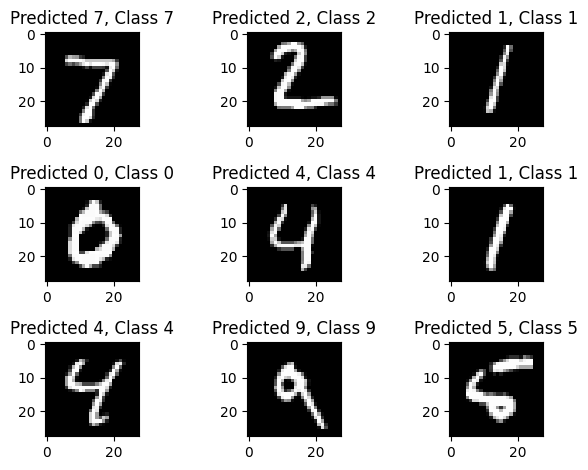

In [9]:
#### // ===================================================================================================== 9. 잘 예측한 데이터 살펴보기

plt.figure()
for i in range(9):
    
    plt.subplot(3, 3, i+1)
    
    correct = correct_indices[i]
         
    plt.imshow(x_test[correct].reshape(28, 28), cmap = 'gray')
    
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

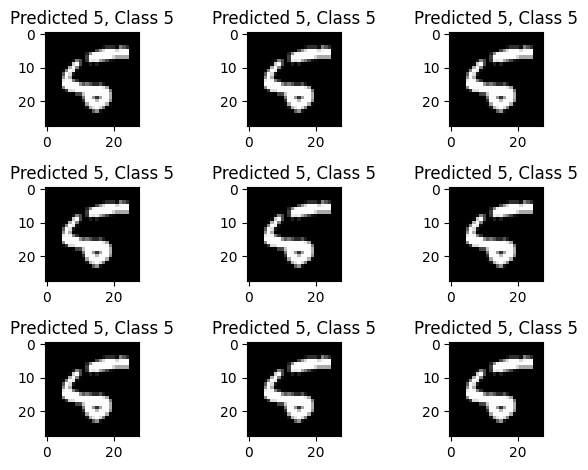

In [10]:
#### // ===================================================================================================== 9. 잘 예측하지 못한 데이터 살펴보기

plt.figure()
for i in range(9):
    
    plt.subplot(3, 3, i+1)
    
    incorrect = incorrect_indices[i]
         
    plt.imshow(x_test[correct].reshape(28, 28), cmap = 'gray')
    
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()